In [ ]:
import pandas as pd

In [14]:
df = pd.read_csv("graduate-admissions/Admission_Predict_Ver1.1.csv")

In [15]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
df.drop(columns=["Serial No."], inplace=True)

In [19]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
df.shape

(500, 8)

In [22]:
df.duplicated().sum()

0

In [24]:
X=df.iloc[:, 0:-1]
y=df.iloc[:, -1]

In [27]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [35]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [92]:
model = Sequential()

In [93]:
model.add(Dense(7, activation="relu", input_dim=7))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="linear"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75 (300.00 B)

 Trainable params: 75 (300.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [96]:
history=model.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5196 - val_loss: 0.5561
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4966 - val_loss: 0.5284
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4673 - val_loss: 0.4730
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4124 - val_loss: 0.3795
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3096 - val_loss: 0.2807
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2419 - val_loss: 0.1906
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1492 - val_loss: 0.1140
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0887 - val_loss: 0.0583
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0447 - val_loss: 0.0295
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - val_loss: 0.0214
Epoch 11/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - val_loss: 0.0206
Epoch 12/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [97]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [98]:
y_pred

array([[0.6551288 ],
       [0.70249563],
       [0.95700675],
       [0.7267175 ],
       [0.8240145 ],
       [0.6630532 ],
       [0.7489617 ],
       [0.73264843],
       [0.79092234],
       [0.669107  ],
       [0.6741959 ],
       [0.5500212 ],
       [0.8017949 ],
       [0.80171365],
       [0.77459794],
       [0.86531144],
       [0.63113356],
       [0.7526639 ],
       [0.9069974 ],
       [0.6744357 ],
       [0.6235431 ],
       [0.78446484],
       [0.846502  ],
       [0.60028577],
       [0.8010608 ],
       [0.590598  ],
       [0.95186   ],
       [0.6493249 ],
       [0.8601735 ],
       [0.70990855],
       [0.63585204],
       [0.8121436 ],
       [0.59686494],
       [0.9133055 ],
       [0.5300058 ],
       [0.81956166],
       [0.6901542 ],
       [0.6402269 ],
       [0.66382366],
       [0.9159161 ],
       [0.54083866],
       [0.666836  ],
       [0.7819216 ],
       [0.9729308 ],
       [0.7848172 ],
       [0.51809126],
       [0.6672177 ],
       [0.643

In [99]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.7692270167887955

In [100]:
import matplotlib.pyplot as plt

In [101]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

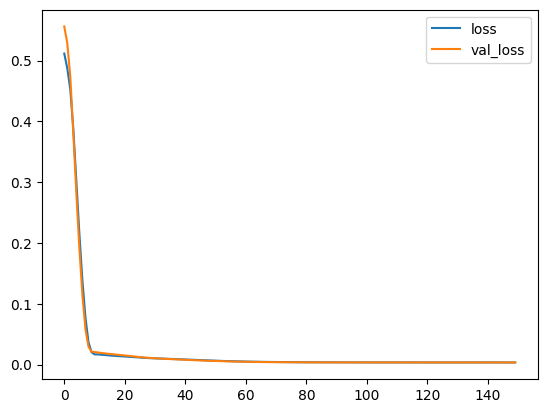

In [102]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()